 # Power Load Prediction for West Zone - SVR Model (Monthly)

In [140]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
import pandas as pd
%matplotlib inline
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

In [141]:
power_data_west = pd.read_csv("westdata_augmented.csv")

/var/folders/7y/xgxlym8j2wvcdq_3kmlw40zm0000gn/T/ipykernel_91276/1727164072.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  power_data_west = pd.read_csv("westdata_augmented.csv")


In [142]:
power_data_west['end'] = pd.to_datetime(power_data_west['end'], infer_datetime_format=True)
indexedDataset = power_data_west.set_index(['end'])

In [143]:
power_data_west['end'].min()

Timestamp('2019-01-29 00:15:00')

In [144]:
power_data_west['end'].max()

Timestamp('2022-01-25 16:00:00')

In [145]:
power_data_west.head()

,Unnamed: 0,index_x,service,start,end,usage,cost,temp,event_flag,demand,sfm,index_y,dt,dt_iso,humidity,humidity_temp,pt_date
0,0,0,west,2019-01-29 00:00:00,2019-01-29 00:15:00,211.2,NaN,54.0,NaN,844.8,2019-01-29 00,680,1548748800,2019-01-29 08,21,63.86,2019-01-29 00
1,1,1,west,2019-01-29 00:15:00,2019-01-29 00:30:00,210.4,NaN,54.0,NaN,841.6,2019-01-29 00,680,1548748800,2019-01-29 08,21,63.86,2019-01-29 00
2,2,2,west,2019-01-29 00:30:00,2019-01-29 00:45:00,208.0,NaN,54.0,NaN,832.0,2019-01-29 00,680,1548748800,2019-01-29 08,21,63.86,2019-01-29 00
3,3,3,west,2019-01-29 00:45:00,2019-01-29 01:00:00,212.0,NaN,54.0,NaN,848.0,2019-01-29 00,680,1548748800,2019-01-29 08,21,63.86,2019-01-29 00
4,4,4,west,2019-01-29 01:00:00,2019-01-29 01:15:00,203.2,NaN,55.0,NaN,812.8,2019-01-29 01,681,1548752400,2019-01-29 09,21,63.41,2019-01-29 01


In [146]:
power_data_west['month'] = power_data_west['end'].dt.strftime('%b')

In [147]:
from calendar import month_abbr

lower_ma = [m.lower() for m in month_abbr]

# one-liner with Pandas
power_data_west['month_int'] = power_data_west['month'].str.lower().map(lambda m: lower_ma.index(m)).astype('Int8')

In [148]:
power_data_west_mod = power_data_west[['end','demand', 'temp', 'humidity', 'month_int']].copy() 

In [149]:
power_data_west_mod.head()

,end,demand,temp,humidity,month_int
0,2019-01-29 00:15:00,844.8,54.0,21,1
1,2019-01-29 00:30:00,841.6,54.0,21,1
2,2019-01-29 00:45:00,832.0,54.0,21,1
3,2019-01-29 01:00:00,848.0,54.0,21,1
4,2019-01-29 01:15:00,812.8,55.0,21,1


In [150]:
power_data_west_mod.describe()

,demand,temp,humidity,month_int
count,104596.000000,104588.00000,104608.000000,104608.00000
mean,1238.634456,67.39232,52.635401,6.54298
std,302.399419,16.59371,22.815913,3.43464
min,0.000000,29.00000,3.000000,1.00000
25%,1008.000000,54.00000,34.000000,4.00000
50%,1232.000000,66.00000,49.000000,7.00000
75%,1472.000000,79.00000,70.000000,10.00000
max,2124.800000,114.00000,100.000000,12.00000


In [151]:
power_data_west_monthly = power_data_west_mod.resample('M', on='end').agg({'demand':'sum', 'temp':'max', 'humidity':'max', 'month_int':'max'})

In [152]:
power_data_west_monthly.describe()

,demand,temp,humidity,month_int
count,3.700000e+01,37.000000,37.000000,37.000000
mean,3.501519e+06,92.378378,92.675676,6.351351
std,9.434659e+05,14.234839,8.618630,3.568506
min,2.772160e+05,65.000000,66.000000,1.000000
25%,2.839475e+06,81.000000,92.000000,3.000000
50%,3.485974e+06,91.000000,96.000000,6.000000
75%,4.200819e+06,105.000000,98.000000,9.000000
max,4.855107e+06,114.000000,100.000000,12.000000


In [153]:
power_data_west_monthly

,demand,temp,humidity,month_int
end,,,,
2019-01-31,277216.00,71.0,92,1
2019-02-28,2218374.40,73.0,97,2
2019-03-31,2509120.00,82.0,96,3
2019-04-30,2498371.21,96.0,95,4
2019-05-31,3713468.80,91.0,100,5
2019-06-30,4560950.40,107.0,82,6
2019-07-31,4615408.00,109.0,72,7
2019-08-31,4078729.60,107.0,81,8
2019-09-30,3485974.40,102.0,95,9


In [154]:
svr_data = power_data_west_monthly[['demand', 'temp', 'humidity', 'month_int']].copy() 

dataset.kW.plot()

## SVR Model

In [155]:
svr_data.head(10)

,demand,temp,humidity,month_int
end,,,,
2019-01-31,277216.00,71.0,92,1
2019-02-28,2218374.40,73.0,97,2
2019-03-31,2509120.00,82.0,96,3
2019-04-30,2498371.21,96.0,95,4
2019-05-31,3713468.80,91.0,100,5
2019-06-30,4560950.40,107.0,82,6
2019-07-31,4615408.00,109.0,72,7
2019-08-31,4078729.60,107.0,81,8
2019-09-30,3485974.40,102.0,95,9


In [156]:
for i in range(1, 6):
    svr_data["demand_lag_{}".format(i)] = svr_data['demand'].shift(i)
    svr_data["temp_lag_{}".format(i)] = svr_data['temp'].shift(i)
    svr_data["humidity_lag_{}".format(i)] = svr_data['humidity'].shift(i)

In [157]:
svr_data.head(10)

,demand,temp,humidity,month_int,demand_lag_1,temp_lag_1,humidity_lag_1,demand_lag_2,temp_lag_2,humidity_lag_2,demand_lag_3,temp_lag_3,humidity_lag_3,demand_lag_4,temp_lag_4,humidity_lag_4,demand_lag_5,temp_lag_5,humidity_lag_5
end,,,,,,,,,,,,,,,,,,,
2019-01-31,277216.00,71.0,92,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-02-28,2218374.40,73.0,97,2,277216.00,71.0,92.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-31,2509120.00,82.0,96,3,2218374.40,73.0,97.0,277216.00,71.0,92.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-30,2498371.21,96.0,95,4,2509120.00,82.0,96.0,2218374.40,73.0,97.0,277216.00,71.0,92.0,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-31,3713468.80,91.0,100,5,2498371.21,96.0,95.0,2509120.00,82.0,96.0,2218374.40,73.0,97.0,277216.00,71.0,92.0,NaN,NaN,NaN
2019-06-30,4560950.40,107.0,82,6,3713468.80,91.0,100.0,2498371.21,96.0,95.0,2509120.00,82.0,96.0,2218374.40,73.0,97.0,277216.00,71.0,92.0
2019-07-31,4615408.00,109.0,72,7,4560950.40,107.0,82.0,3713468.80,91.0,100.0,2498371.21,96.0,95.0,2509120.00,82.0,96.0,2218374.40,73.0,97.0
2019-08-31,4078729.60,107.0,81,8,4615408.00,109.0,72.0,4560950.40,107.0,82.0,3713468.80,91.0,100.0,2498371.21,96.0,95.0,2509120.00,82.0,96.0
2019-09-30,3485974.40,102.0,95,9,4078729.60,107.0,81.0,4615408.00,109.0,72.0,4560950.40,107.0,82.0,3713468.80,91.0,100.0,2498371.21,96.0,95.0


In [158]:
svr_data.tail(10)

,demand,temp,humidity,month_int,demand_lag_1,temp_lag_1,humidity_lag_1,demand_lag_2,temp_lag_2,humidity_lag_2,demand_lag_3,temp_lag_3,humidity_lag_3,demand_lag_4,temp_lag_4,humidity_lag_4,demand_lag_5,temp_lag_5,humidity_lag_5
end,,,,,,,,,,,,,,,,,,,
2021-04-30,3342217.60,97.0,100,4,3699497.59,86.0,98.0,3039411.20,74.0,99.0,3484392.00,76.0,98.0,3459385.60,79.0,98.0,3399993.60,90.0,96.0
2021-05-31,4185731.20,103.0,92,5,3342217.60,97.0,100.0,3699497.59,86.0,98.0,3039411.20,74.0,99.0,3484392.00,76.0,98.0,3459385.60,79.0,98.0
2021-06-30,4855107.24,114.0,92,6,4185731.20,103.0,92.0,3342217.60,97.0,100.0,3699497.59,86.0,98.0,3039411.20,74.0,99.0,3484392.00,76.0,98.0
2021-07-31,3984480.00,114.0,79,7,4855107.24,114.0,92.0,4185731.20,103.0,92.0,3342217.60,97.0,100.0,3699497.59,86.0,98.0,3039411.20,74.0,99.0
2021-08-31,4376488.00,110.0,77,8,3984480.00,114.0,79.0,4855107.24,114.0,92.0,4185731.20,103.0,92.0,3342217.60,97.0,100.0,3699497.59,86.0,98.0
2021-09-30,4704580.80,112.0,96,9,4376488.00,110.0,77.0,3984480.00,114.0,79.0,4855107.24,114.0,92.0,4185731.20,103.0,92.0,3342217.60,97.0,100.0
2021-10-31,4200819.20,99.0,97,10,4704580.80,112.0,96.0,4376488.00,110.0,77.0,3984480.00,114.0,79.0,4855107.24,114.0,92.0,4185731.20,103.0,92.0
2021-11-30,4068856.00,80.0,98,11,4200819.20,99.0,97.0,4704580.80,112.0,96.0,4376488.00,110.0,77.0,3984480.00,114.0,79.0,4855107.24,114.0,92.0
2021-12-31,3493072.00,81.0,99,12,4068856.00,80.0,98.0,4200819.20,99.0,97.0,4704580.80,112.0,96.0,4376488.00,110.0,77.0,3984480.00,114.0,79.0


In [159]:
svr_data.dtypes

demand            float64
temp              float64
humidity            int64
month_int            Int8
demand_lag_1      float64
temp_lag_1        float64
humidity_lag_1    float64
demand_lag_2      float64
temp_lag_2        float64
humidity_lag_2    float64
demand_lag_3      float64
temp_lag_3        float64
humidity_lag_3    float64
demand_lag_4      float64
temp_lag_4        float64
humidity_lag_4    float64
demand_lag_5      float64
temp_lag_5        float64
humidity_lag_5    float64
dtype: object

In [160]:
from sklearn.svm import SVR

In [161]:
def timeseries_train_test_split(X, y, test_size):
    
    # get the index after which test set starts
    test_index = int(len(X)*(1-test_size))
    
    X_train = X.iloc[:test_index]
    y_train = y.iloc[:test_index]
    X_test = X.iloc[test_index:]
    y_test = y.iloc[test_index:]
    
    return X_train, X_test, y_train, y_test

In [162]:
y = svr_data.dropna()['demand']
X = svr_data.dropna().drop(['demand', 'temp', 'humidity'], axis=1)

In [163]:
X_train, X_test, y_train, y_test = timeseries_train_test_split(X, y, test_size=0.3)

In [191]:
X_train

,month_int,demand_lag_1,temp_lag_1,humidity_lag_1,demand_lag_2,temp_lag_2,humidity_lag_2,demand_lag_3,temp_lag_3,humidity_lag_3,demand_lag_4,temp_lag_4,humidity_lag_4,demand_lag_5,temp_lag_5,humidity_lag_5
end,,,,,,,,,,,,,,,,
2019-06-30,6,3713468.80,91.0,100.0,2498371.21,96.0,95.0,2509120.00,82.0,96.0,2218374.40,73.0,97.0,277216.00,71.0,92.0
2019-07-31,7,4560950.40,107.0,82.0,3713468.80,91.0,100.0,2498371.21,96.0,95.0,2509120.00,82.0,96.0,2218374.40,73.0,97.0
2019-08-31,8,4615408.00,109.0,72.0,4560950.40,107.0,82.0,3713468.80,91.0,100.0,2498371.21,96.0,95.0,2509120.00,82.0,96.0
2019-09-30,9,4078729.60,107.0,81.0,4615408.00,109.0,72.0,4560950.40,107.0,82.0,3713468.80,91.0,100.0,2498371.21,96.0,95.0
2019-10-31,10,3485974.40,102.0,95.0,4078729.60,107.0,81.0,4615408.00,109.0,72.0,4560950.40,107.0,82.0,3713468.80,91.0,100.0
2019-11-30,11,3125310.40,90.0,91.0,3485974.40,102.0,95.0,4078729.60,107.0,81.0,4615408.00,109.0,72.0,4560950.40,107.0,82.0
2019-12-31,12,3014559.98,81.0,95.0,3125310.40,90.0,91.0,3485974.40,102.0,95.0,4078729.60,107.0,81.0,4615408.00,109.0,72.0
2020-01-31,1,2839475.20,73.0,99.0,3014559.98,81.0,95.0,3125310.40,90.0,91.0,3485974.40,102.0,95.0,4078729.60,107.0,81.0
2020-02-29,2,2657459.20,65.0,98.0,2839475.20,73.0,99.0,3014559.98,81.0,95.0,3125310.40,90.0,91.0,3485974.40,102.0,95.0


In [199]:
y_train

array([[4560950.4 ],
       [4615408.  ],
       [4078729.6 ],
       [3485974.4 ],
       [3125310.4 ],
       [3014559.98],
       [2839475.2 ],
       [2657459.2 ],
       [2448260.8 ],
       [2675177.6 ],
       [2664576.  ],
       [3211790.39],
       [3941260.8 ],
       [4237448.  ],
       [4534379.2 ],
       [4738486.4 ],
       [4598334.4 ],
       [3399993.6 ],
       [3459385.6 ],
       [3484392.  ],
       [3039411.2 ],
       [3699497.59]])

In [164]:
X_train.shape

(22, 16)

In [165]:
y_train = y_train.values.reshape((22,1))
y_train.shape

(22, 1)

In [192]:
X_test

,month_int,demand_lag_1,temp_lag_1,humidity_lag_1,demand_lag_2,temp_lag_2,humidity_lag_2,demand_lag_3,temp_lag_3,humidity_lag_3,demand_lag_4,temp_lag_4,humidity_lag_4,demand_lag_5,temp_lag_5,humidity_lag_5
end,,,,,,,,,,,,,,,,
2021-04-30,4,3699497.59,86.0,98.0,3039411.20,74.0,99.0,3484392.00,76.0,98.0,3459385.60,79.0,98.0,3399993.60,90.0,96.0
2021-05-31,5,3342217.60,97.0,100.0,3699497.59,86.0,98.0,3039411.20,74.0,99.0,3484392.00,76.0,98.0,3459385.60,79.0,98.0
2021-06-30,6,4185731.20,103.0,92.0,3342217.60,97.0,100.0,3699497.59,86.0,98.0,3039411.20,74.0,99.0,3484392.00,76.0,98.0
2021-07-31,7,4855107.24,114.0,92.0,4185731.20,103.0,92.0,3342217.60,97.0,100.0,3699497.59,86.0,98.0,3039411.20,74.0,99.0
2021-08-31,8,3984480.00,114.0,79.0,4855107.24,114.0,92.0,4185731.20,103.0,92.0,3342217.60,97.0,100.0,3699497.59,86.0,98.0
2021-09-30,9,4376488.00,110.0,77.0,3984480.00,114.0,79.0,4855107.24,114.0,92.0,4185731.20,103.0,92.0,3342217.60,97.0,100.0
2021-10-31,10,4704580.80,112.0,96.0,4376488.00,110.0,77.0,3984480.00,114.0,79.0,4855107.24,114.0,92.0,4185731.20,103.0,92.0
2021-11-30,11,4200819.20,99.0,97.0,4704580.80,112.0,96.0,4376488.00,110.0,77.0,3984480.00,114.0,79.0,4855107.24,114.0,92.0
2021-12-31,12,4068856.00,80.0,98.0,4200819.20,99.0,97.0,4704580.80,112.0,96.0,4376488.00,110.0,77.0,3984480.00,114.0,79.0


In [166]:
X_test.shape

(10, 16)

In [167]:
y_test = y_test.values.reshape((10,1))
y_test.shape

(10, 1)

In [168]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train_scaled = sc_X.fit_transform(X_train)
y_train_scaled = sc_y.fit_transform(y_train)

In [169]:
X_train_scaled.shape

(22, 16)

In [170]:
y_train_scaled.shape

(22, 1)

In [171]:
X_test_scaled = sc_X.transform(X_test)
y_test_scaled = sc_y.fit_transform(y_test)

In [172]:
X_test_scaled.shape

(10, 16)

In [173]:
y_test_scaled.shape

(10, 1)

In [175]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor

print('Starting Model Training')

svr_model = SVR(kernel='rbf')

svr_model.fit(X_train_scaled, y_train_scaled)

print(' Model Training Completed')

Starting Model Training
 Model Training Completed


/Users/diveshkumar/Library/Python/3.8/lib/python/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [176]:
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
from sklearn.metrics import mean_squared_error



def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def mean_absolute_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred)))

def mse_error(y_true, y_pred): 
    return mean_squared_error(y_true, y_pred, squared=True)

def rmse_error(y_true, y_pred): 
    return mean_squared_error(y_true, y_pred, squared=False)

[ 0.77328627  1.34746275  0.80567181  0.09803866 -0.51342029 -0.66632446
 -0.90804061 -1.15997011 -1.30706872 -1.13587912 -0.91582809 -0.39356989
  0.41535562  0.89083962  1.21930161  0.60490535  0.25121189 -0.18654532
 -0.25134057 -0.21630973 -0.63183295 -0.81185348]
shape of y_train (22,)
shape of prediction (22,)


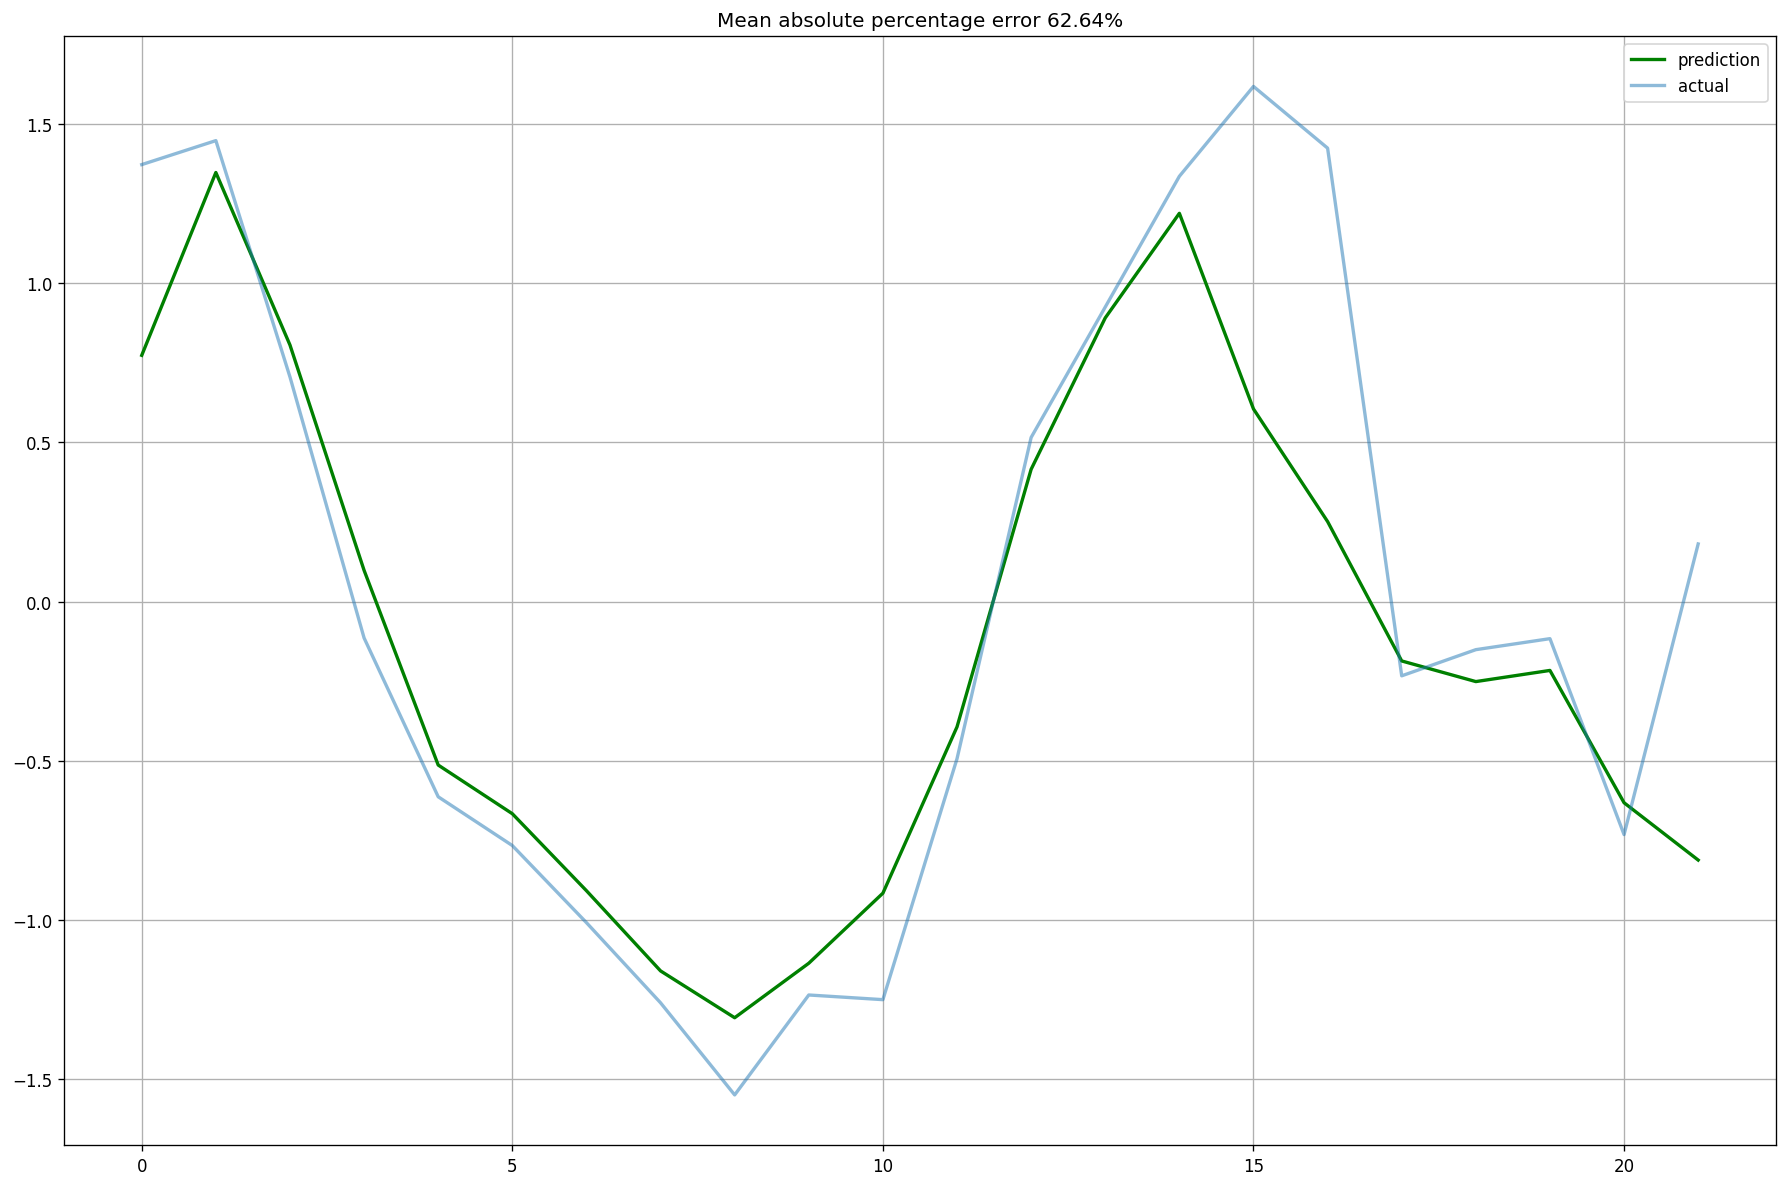

In [177]:
def plotModelTrainingResults(model, X_train=X_train_scaled, X_test=X_test_scaled, y_train=y_train_scaled, y_test=y_test_scaled):
  
    prediction = model.predict(X_train)
    print(prediction)
    
    prediction = prediction.reshape((22,))
    y_train = y_train.reshape((22,))
    
    print('shape of y_train', y_train.shape)
    print('shape of prediction', prediction.shape)
    
    plt.figure(figsize=(15, 10))
    plt.plot(prediction, "g", label="prediction", linewidth=2.0)
    plt.plot(y_train, label="actual", linewidth=2.0, alpha=0.5)

    mape_error_var = mean_absolute_percentage_error(prediction, y_train)
    mae_error_var = mean_absolute_error(prediction, y_train)
    mse_error_var = mse_error(prediction, y_train)
    rmse_error_var = rmse_error(prediction, y_train)
    
    plt.title("Mean absolute percentage error {0:.2f}%".format(mape_error_var))
    plt.legend(loc="best")
    plt.tight_layout()
    plt.grid(True);
    
    
    
    
    results = pd.DataFrame({'Actual':y_train, 
                            'Prediction':prediction 
                           })
    
    return results, mape_error_var, mae_error_var, mse_error_var, rmse_error_var
    
train_results, train_mape_error_var, train_mae_error_var, train_mse_error_var, train_rmse_error_var = plotModelTrainingResults(svr_model)

In [189]:
train_results

,Actual,Prediction
0,1.372278,0.773286
1,1.447589,1.347463
2,0.705404,0.805672
3,-0.114332,0.098039
4,-0.613102,-0.513420
5,-0.766262,-0.666324
6,-1.008391,-0.908041
7,-1.260105,-1.159970
8,-1.549410,-1.307069
9,-1.235602,-1.135879


In [193]:
actual_inv_train_transform = sc_y.inverse_transform(train_results['Actual'].to_numpy().reshape((22,1)))
actual_inv_train_transform

array([[4855791.98785575],
       [4903694.16302176],
       [4431619.32453073],
       [3910218.02478637],
       [3592969.5580146 ],
       [3495550.90536468],
       [3341542.24908051],
       [3181436.73001587],
       [2997420.93789049],
       [3197022.24793185],
       [3187696.83329294],
       [3669039.37433655],
       [4310698.56163519],
       [4571231.73122635],
       [4832419.34057106],
       [5011956.79442584],
       [4888675.82622553],
       [3834587.30763187],
       [3886829.89613117],
       [3908826.1088374 ],
       [3517410.61812339],
       [4098038.00307009]])

In [195]:
prediction_inv_train_transform = sc_y.inverse_transform(train_results['Prediction'].to_numpy().reshape((22,1)))
prediction_inv_train_transform

array([[4474796.78890373],
       [4840007.83996145],
       [4495395.95595381],
       [4045298.37435188],
       [3656373.41256188],
       [3559117.09231245],
       [3405370.96417475],
       [3245128.53117264],
       [3151564.89535286],
       [3260451.86352022],
       [3400417.65891632],
       [3732605.53167935],
       [4247131.19903375],
       [4549567.84383224],
       [4758489.58090876],
       [4367696.31333362],
       [4142725.83392798],
       [3864285.70742572],
       [3823072.00102678],
       [3845353.74067503],
       [3581055.78083242],
       [3466551.81094603]])

In [196]:
train_results_final = pd.DataFrame({'Actual':actual_inv_train_transform.reshape((22,)), 
                            'Prediction':prediction_inv_train_transform.reshape((22,))  
                           })
train_results_final

,Actual,Prediction
0,4.855792e+06,4.474797e+06
1,4.903694e+06,4.840008e+06
2,4.431619e+06,4.495396e+06
3,3.910218e+06,4.045298e+06
4,3.592970e+06,3.656373e+06
5,3.495551e+06,3.559117e+06
6,3.341542e+06,3.405371e+06
7,3.181437e+06,3.245129e+06
8,2.997421e+06,3.151565e+06
9,3.197022e+06,3.260452e+06


In [198]:
train_results_final.to_csv('Monthly_SVR_Model_Train_Results.csv')

In [179]:
print('MAPE: ' , train_mape_error_var)
print('MAE: ', train_mae_error_var)
print('MSE: ', train_mse_error_var)
print('RMSE: ', train_rmse_error_var)

MAPE:  62.64358230092939
MAE:  0.27108058724598677
MSE:  0.18628876949491158
RMSE:  0.43161182733436715


shape of y_train (22, 1)
shape of prediction (10,)
Predictions
[-0.52057597 -0.18459869  0.57969358  0.80993731  0.46672216  0.19071953
  0.06032853 -0.15567898 -0.27693846 -0.21510012]
Test
[-1.00732889  0.31882395  1.37120169  0.0024214   0.61872744  1.13454745
  0.34254496  0.13507542 -0.77015905 -2.14585436]


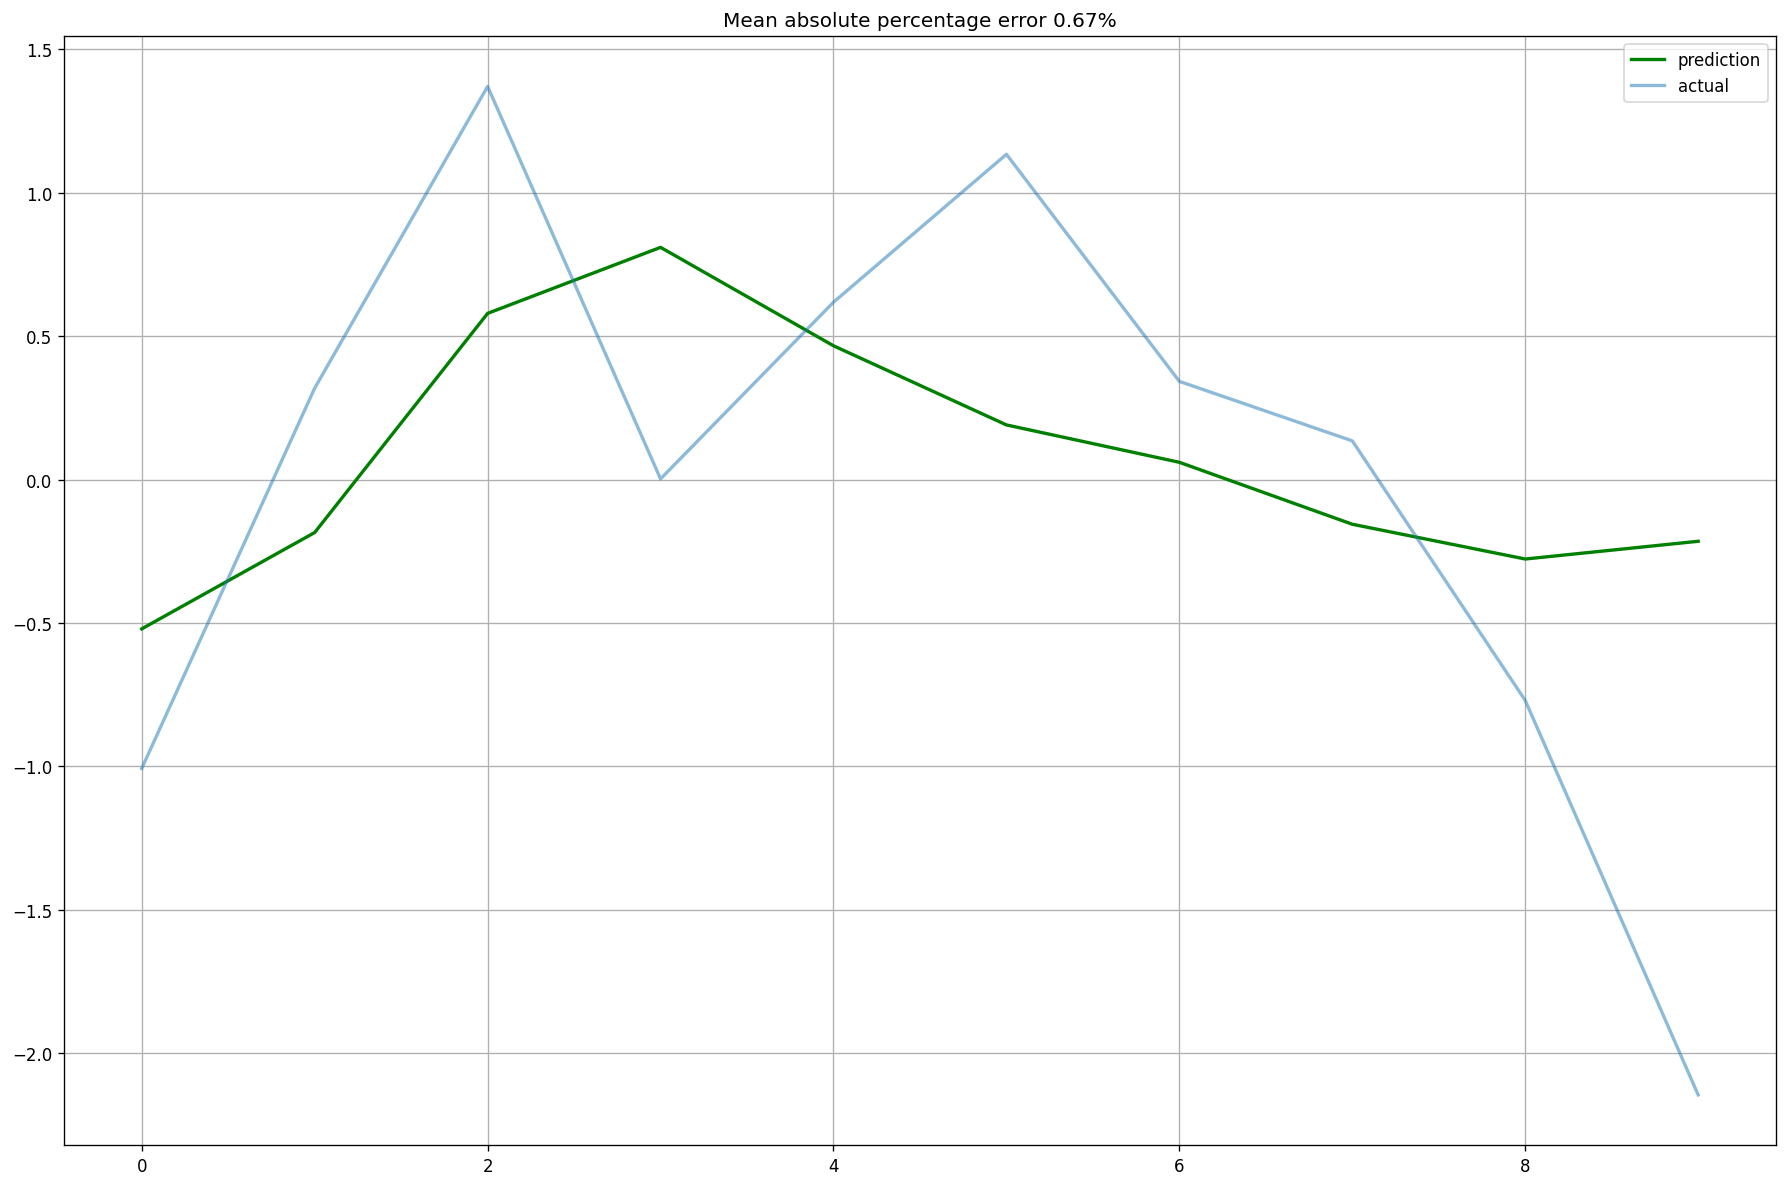

In [180]:
def plotModelPredictions(model, X_train=X_train_scaled, X_test=X_test_scaled, y_train=y_train_scaled, y_test=y_test_scaled):
  
    prediction = model.predict(X_test)
    
    prediction = prediction.reshape((10,))
    y_test = y_test.reshape((10,))
    
    print('shape of y_train', y_train.shape)
    print('shape of prediction', prediction.shape)
    
    plt.figure(figsize=(15, 10))
    plt.plot(prediction, "g", label="prediction", linewidth=2.0)
    plt.plot(y_test, label="actual", linewidth=2.0, alpha=0.5)
    
    print('Predictions')
    print(prediction)
    
    print('Test')
    print(y_test)

    mape_error_var = mean_absolute_percentage_error(prediction, y_test)
    mae_error_var = mean_absolute_error(prediction, y_test)
    mse_error_var = mse_error(prediction, y_test)
    rmse_error_var = rmse_error(prediction, y_test)
    
    plt.title("Mean absolute percentage error {0:.2f}%".format(mae_error_var))
    plt.legend(loc="best")
    plt.tight_layout()
    plt.grid(True);
    
    results = pd.DataFrame({'Actual':y_test, 
                            'Prediction':prediction  
                           })
    
    return results, mape_error_var, mae_error_var, mse_error_var, rmse_error_var
    
results, mape_error_var, mae_error_var, mse_error_var, rmse_error_var = plotModelPredictions(svr_model)

In [190]:
results

,Actual,Prediction
0,-1.007329,-0.520576
1,0.318824,-0.184599
2,1.371202,0.579694
3,0.002421,0.809937
4,0.618727,0.466722
5,1.134547,0.190720
6,0.342545,0.060329
7,0.135075,-0.155679
8,-0.770159,-0.276938
9,-2.145854,-0.215100


In [182]:
actual_inv_transform = sc_y.inverse_transform(results['Actual'].to_numpy().reshape((10,1)))
actual_inv_transform

array([[3342217.6 ],
       [4185731.2 ],
       [4855107.24],
       [3984480.  ],
       [4376488.  ],
       [4704580.8 ],
       [4200819.2 ],
       [4068856.  ],
       [3493072.  ],
       [2618046.38]])

In [183]:
prediction_inv_transform = sc_y.inverse_transform(results['Prediction'].to_numpy().reshape((10,1)))
prediction_inv_transform

array([[3651821.9650343 ],
       [3865523.88207185],
       [4351660.10015926],
       [4498109.072545  ],
       [4279803.42726372],
       [4104249.02234167],
       [4021312.44214593],
       [3883918.57468901],
       [3806790.19264395],
       [3846123.12319061]])

In [184]:
trans_results = pd.DataFrame({'Actual':actual_inv_transform.reshape((10,)), 
                            'Prediction':prediction_inv_transform.reshape((10,))  
                           })
trans_results

,Actual,Prediction
0,3342217.60,3.651822e+06
1,4185731.20,3.865524e+06
2,4855107.24,4.351660e+06
3,3984480.00,4.498109e+06
4,4376488.00,4.279803e+06
5,4704580.80,4.104249e+06
6,4200819.20,4.021312e+06
7,4068856.00,3.883919e+06
8,3493072.00,3.806790e+06
9,2618046.38,3.846123e+06


<AxesSubplot:>

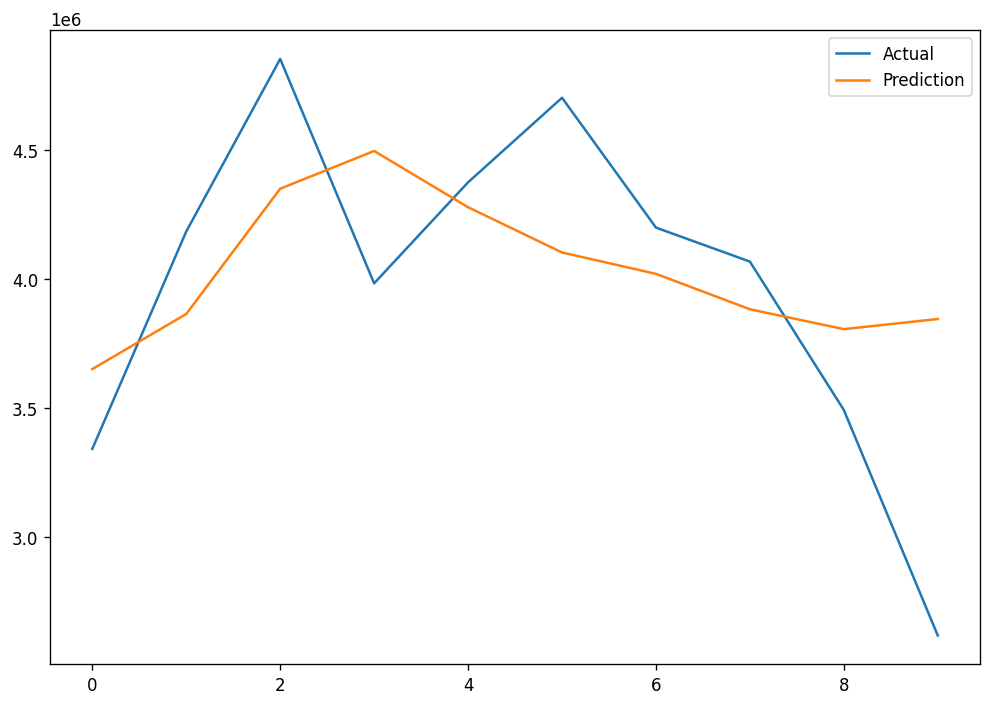

In [185]:
trans_results.plot()

In [186]:
mape_error_var = mean_absolute_percentage_error(trans_results['Prediction'], trans_results['Actual'])
mae_error_var = mean_absolute_error(trans_results['Prediction'], trans_results['Actual'])
mse_error_var = mse_error(trans_results['Prediction'], trans_results['Actual'])
rmse_error_var = rmse_error(trans_results['Prediction'], trans_results['Actual'])

print('MAPE: ' , mape_error_var)
print('MAE: ', mae_error_var)
print('MSE: ', mse_error_var)
print('RMSE: ', rmse_error_var)

MAPE:  10.603255103704834
MAE:  425014.3364742415
MSE:  275842370490.9281
RMSE:  525206.9787149901


In [187]:
import joblib
joblib.dump(svr_model, "./svr_model_monthly.joblib")

['./svr_model_monthly.joblib']

In [188]:
trans_results.to_csv('Monthly_SVR_Model_Test_Results.csv')